In [1]:
import pandas as pd
import numpy as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import fashion_mnist
from keras import models,layers

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Neural Network Architecture Definition

In [2]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## Loading dataset, Feature Scaling and Reshaping

In [3]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255.0  #Feature Scaling --> numbers from 0 to 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255.0

### Reshaping the train and test labels as the output layer

In [4]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

## Fitting the model

In [5]:
history = model.fit(train_images,train_labels,epochs=5,batch_size=512)

Epoch 1/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.7355 - acc: 0.7443
Epoch 2/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.4843 - acc: 0.8244
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.4122 - acc: 0.8498
Epoch 4/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3755 - acc: 0.8622
Epoch 5/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3468 - acc: 0.8738


In [6]:
print(history.history['loss'])
print(history.history['acc'])

[0.7355401368459066, 0.48434481949806213, 0.41219674909909565, 0.375456020228068, 0.34682854597568513]
[0.7443333333015442, 0.8244333333333334, 0.8498499999682109, 0.8622166666348775, 0.8738499999682109]


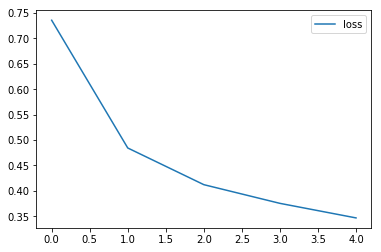

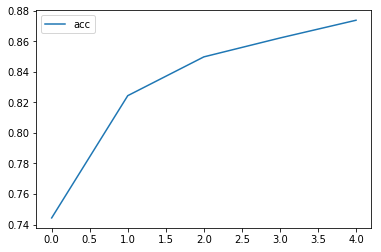

In [7]:
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()
plt.close()

plt.plot(history.history['acc'],label='acc')
plt.legend()
plt.show()
plt.close()

In [8]:
# The cost function is not converging so probably it will be possible to improve the model

In [9]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(test_loss,test_acc)

10000/10000 [==============================] - 1s 63us/step
0.4692082730293274 0.8367


In [10]:
# We go from an accuracy of 90% to an accuracy of 84% and this means overfitting